In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
bankdata=pd.read_csv("E:\\afitech\\Afitech PPML Datasets\\bill_authentication.csv")

In [3]:
bankdata.shape

(1372, 5)

In [4]:
bankdata.describe

<bound method NDFrame.describe of       Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
y=bankdata.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [8]:
x=bankdata.iloc[:,:-1].values
y=bankdata.iloc[:,4].values
print(x)
print(y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0 0 0 ... 1 1 1]


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler1=StandardScaler()
scaler1.fit(x_train)

x_train=scaler1.transform(x_train)
x_test=scaler1.transform(x_test)

In [11]:
x_train

array([[ 0.37483673,  0.64021334, -0.29459092,  0.55253178],
       [ 1.0607077 ,  1.17066359, -1.06127904,  0.12718044],
       [ 0.27330011,  0.35703079, -1.40100262, -1.29189625],
       ...,
       [-0.94807943, -1.13636266,  1.16575629,  0.61820523],
       [ 0.8418492 ,  1.20446779, -1.19493618, -1.01877507],
       [-0.57154341, -0.54216783,  0.21180293,  0.9318484 ]])

In [12]:
x_test

array([[ 0.17822459,  0.09182269,  0.72417867,  0.66792145],
       [ 1.76995905,  1.43553126, -1.34718017, -1.34344467],
       [-0.04124992, -1.08740955,  0.75079802,  0.0958764 ],
       ...,
       [ 0.11585009,  0.80154075, -0.58350845,  0.06336198],
       [ 0.24911472,  1.19144653, -0.80258101,  0.03018302],
       [-0.9586146 , -1.56431094,  1.541883  ,  1.00243556]])

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier(n_neighbors=15)
classifier1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [14]:
y_pred=classifier1.predict(x_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[156   1]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       0.99      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [16]:
error=[]

In [17]:
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    #!= refers to not equal to.

In [18]:
error

[0.0036363636363636364,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0036363636363636364,
 0.01090909090909091,
 0.01090909090909091,
 0.01090909090909091,
 0.01090909090909091,
 0.01090909090909091,
 0.01090909090909091,
 0.01090909090909091,
 0.01090909090909091,
 0.01090909090909091,
 0.01090909090909091,
 0.01090909090909091,
 0.014545454545454545]

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Mean Error')

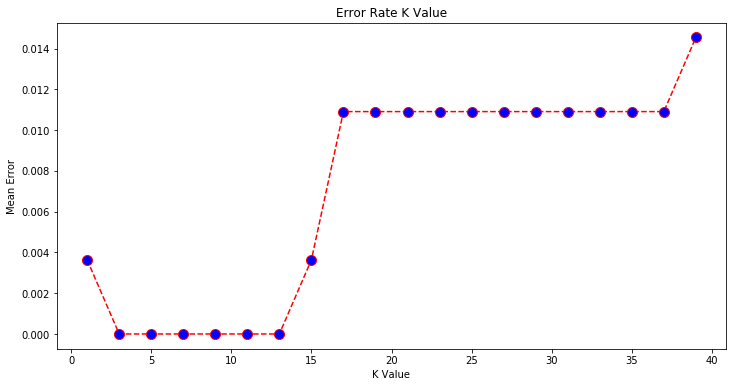

In [20]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40,2),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')